
## The premise of the tools.ipynb is to create a set of helper functions
#### to easiliy access the processed_feature and visualize them


In [1]:
import sys; sys.path.insert(0, '/home/vamber/ML_stock/')
from Download.feature_downloader_hypervisor import create_feature_downloader_hypervisor_from_one_row_of_stock_and_features_csv
import pandas as pd

In [2]:
from functools import reduce

In [46]:
import numpy as np

In [3]:
#all CONSTANT_VARIABLE
ROOT = "/home/vamber/ML_stock/"

In [4]:
df_stocks = pd.read_csv(ROOT + "Data/stock_and_features.csv")

In [5]:
df_stocks.head(5)

,Nasdaq_code,start_date,google_trend_kw_lst,news_kw_lst
0,ASML,2020-2-18,"[asml stock,asml]",[ASML]
1,CRM,2020-2-18,"[salesforce,salesforce stock]",[Salesforce]
2,SNY,2020-2-18,"[sanofi,sanofi stock]",[Sanofi]
3,NOW,2020-2-18,"[service now,service now stock]",[Servicenow]
4,PLD,2020-2-19,[prologis],[prologis]


In [6]:
def get_row_based_on_NASDAQ(NASDAQ_code):
    df_stocks = pd.read_csv(ROOT + "Data/stock_and_features.csv")
    row = df_stocks[df_stocks["Nasdaq_code"] == NASDAQ_code]
    return row.iloc[0]

In [7]:
def str_to_lst(string):
    return string.strip("[").strip("]").split(",")

In [8]:
row = get_row_based_on_NASDAQ("ASML")

In [9]:
# it shows the NASDAQ_code
# shows last day of download
# shows shows total date missing for each feature

def show_overall_download_status(NASDAQ_code):
    ROOT = "/home/vamber/ML_stock/"
    row_of_stock = get_row_based_on_NASDAQ(NASDAQ_code)
    stock_feature_hypervisor = create_feature_downloader_hypervisor_from_one_row_of_stock_and_features_csv(row_of_stock)
    lst_of_feature_downloader = stock_feature_hypervisor.get_feature_downloader_lst()

    # user fd to short for feature downloader
    stock_price_fd = None
    google_news_fds = []
    google_trend_fds = []

    for fd in lst_of_feature_downloader:
        fd_type = fd.type_of_feature_downloader()

        if fd_type == "stock_price":
            stock_price_fd = fd
        elif fd_type == "google_news":
            google_news_fds.append(fd)
        elif fd_type == "google_trend":
            google_trend_fds.append(fd)

    stock_price_df = pd.read_csv( ROOT + stock_price_fd.processed_work_dir + "/price.csv" )
    most_recent_day = stock_price_df.iloc[-1]
    date = most_recent_day["Date"]
    price = round(most_recent_day["Close"],1)
    print(NASDAQ_code)
    print(date + "   " + str(price) + "$")

    for news_fd in google_news_fds:
        key_word = news_fd.keyword
        dates_missing = pd.read_csv(ROOT + news_fd.work_dir + "/dates_not_downloaded.csv")
        num_missing = len(list(dates_missing["dates"]))
        print("news" + "    " + key_word + "  " + str(num_missing) + " missed")

    for trend_fd in google_trend_fds:
        key_word = trend_fd.keyword
        dates_missing = pd.read_csv(ROOT + trend_fd.work_dir + "/dates_not_downloaded.csv")
        num_missing = len(list(dates_missing["dates"]))
        print("trend" + "    " + key_word + "  " + str(num_missing) + " missed")



    

    
            


In [10]:
show_overall_download_status("AMD")

AMD
2021-12-31   143.9$
news    amd  0 missed
news    amd stock  0 missed
trend    amd  56 missed
trend    amd stock  57 missed
trend    buy amd stock  56 missed


In [12]:
def get_news_df_of_kw_on_date(Nasdaq_code, kw, date):
    ROOT = "/home/vamber/ML_stock/"
    df_path = ROOT + "/Data/Feature/" + Nasdaq_code + "/Processed_Features/Google_News/"+ kw + "/" + date + ".csv"
    df = pd.read_csv(df_path)
    df["date"] = [date]*df["total_news_today"].iloc[0]
    df = df.rename(columns={"sentiment_score":kw + "_" + "sentiment_score",
                            "total_news_today": kw + "_" + "news_num"})
                            
    return df[["date",kw + "_" + "sentiment_score", kw + "_" + "news_num"]]
    

In [13]:
df = get_news_df_of_kw_on_date("JD", "JD", "2021-09-18")

In [14]:
def get_news_df_of_kw_on_lst_of_dates(Nasdaq_code, kw, lst_date):
    news_df = []
    for date in lst_date:
        news_df.append(get_news_df_of_kw_on_date(Nasdaq_code, kw, date))

    mega_df = pd.concat(news_df)
    return mega_df
    





In [15]:
mega_df = get_news_df_of_kw_on_lst_of_dates("JD", "JD", ["2021-09-18", "2021-09-19", "2021-09-20"])

In [16]:
mega_df

,date,JD_sentiment_score,JD_news_num
0,2021-09-18,0.0,5
1,2021-09-18,0.0,5
2,2021-09-18,0.0,5
3,2021-09-18,0.0,5
4,2021-09-18,-1.9,5
0,2021-09-19,0.0,6
1,2021-09-19,0.0,6
2,2021-09-19,0.0,6
3,2021-09-19,0.0,6
4,2021-09-19,-1.0,6


In [17]:
df

,date,JD_sentiment_score,JD_news_num
0,2021-09-18,0.0,5
1,2021-09-18,0.0,5
2,2021-09-18,0.0,5
3,2021-09-18,0.0,5
4,2021-09-18,-1.9,5


In [ ]:
mega_df.groupby("date").max()

,title,source,total_news_today,JD_sentiment_score
date,,,,
2021-09-18,Jimmy Dale 'JD' Caldwell | Obituaries | swokne...,Times of India,5,0.0
2021-09-19,"WATCH: J.D. Martinez, Boston Red Sox slug way ...",Times of India,6,0.0
2021-09-20,‘A part of me was taken away’: Emotional testi...,fox5sandiego.com,10,3.3


In [21]:
def agg_news_df(news_df, kw):
    df = news_df[["date", kw + "_news_num", kw + "_" + "sentiment_score"]]
    ret_df = df.groupby("date").mean()
    ret_df[kw + "_" + "sentiment_score_max"] = df.groupby("date").max()[kw + "_" + "sentiment_score"]
    ret_df[kw + "_" + "sentiment_score_min"] = df.groupby("date").min()[kw + "_" +"sentiment_score"]
    ret_df = ret_df.reset_index()
    return ret_df
    


In [22]:
agg_news_df(mega_df, "JD")

,date,JD_news_num,JD_sentiment_score,JD_sentiment_score_max,JD_sentiment_score_min
0,2021-09-18,5,-0.380000,0.0,-1.9
1,2021-09-19,6,-0.166667,0.0,-1.0
2,2021-09-20,10,0.330000,3.3,0.0


In [23]:
def get_trend_df_of_kw_on_date(Nasdaq_code, kw, date):
    ROOT = "/home/vamber/ML_stock/"
    df_path = ROOT + "/Data/Feature/" + Nasdaq_code + "/Processed_Features/Google_Trends/"+ kw + "/" + date + ".csv"
    df = pd.read_csv(df_path)
    df = df.rename(columns={"only_day": "date"})
    return df

In [24]:
get_trend_df_of_kw_on_date("AMD", "amd stock", "2021-05-18")

,date,amd stock
0,2021-05-12,80
1,2021-05-13,82
2,2021-05-14,100
3,2021-05-15,26
4,2021-05-16,14
5,2021-05-17,81
6,2021-05-18,86


In [25]:
def get_stock_price_df(Nasdaq_code):
    ROOT = "/home/vamber/ML_stock/"
    df_path = ROOT + "/Data/Feature/" + Nasdaq_code + "/Processed_Features/Stock_Price/price.csv"
    start = 800
    df = pd.read_csv(df_path)
    start = 0
    if len(df) >= 600:
        start = -600

    df = df.rename(columns={"Date": "date", "Open":"open", "Close":"close"})
    return df.iloc[start:][["date", "open", "close"]]


In [26]:
get_stock_price_df("AMD")

,date,open,close
9940,2019-08-16,30.309999,31.180000
9941,2019-08-19,32.000000,31.480000
9942,2019-08-20,30.940001,30.719999
9943,2019-08-21,31.049999,31.700001
9944,2019-08-22,31.760000,31.900000
...,...,...,...
10535,2021-12-27,147.509995,154.360001
10536,2021-12-28,155.880005,153.149994
10537,2021-12-29,152.820007,148.259995
10538,2021-12-30,147.440002,145.149994


In [27]:
get_row_based_on_NASDAQ("SE")

Nasdaq_code                                 SE
start_date                           2020-2-18
google_trend_kw_lst    [sea limited,sea stock]
news_kw_lst                      [Sea Limited]
Name: 18, dtype: object

In [51]:
#
# plot import important features related to a stock during a seven days interval
# stock opening + closing pricing
# number of news published 
# sentiment score
# google trend 

# the reason why this option here is a week is because google trend data is generally a week

def get_df_visualize_stock_data_for_a_week(NASDAQ, date):
    row_of_stock = get_row_based_on_NASDAQ(NASDAQ)
    trend_kw_lst = str_to_lst(row_of_stock["google_trend_kw_lst"])
    news_kw_lst = str_to_lst((row_of_stock["news_kw_lst"]))

    trend_dfs = []
    for trend_kw in trend_kw_lst:
        trend_dfs.append(get_trend_df_of_kw_on_date(NASDAQ, trend_kw, date))

    mega_trend_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='date', how="inner"), trend_dfs)

    #let's extract the date of all dates for teh week
    lst_of_date = list(mega_trend_df["date"])

    news_dfs = []
    for news_kw in news_kw_lst:
        news_dfs.append(agg_news_df(get_news_df_of_kw_on_lst_of_dates(NASDAQ, news_kw, lst_of_date), news_kw))

    mega_news_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='date', how="inner"), news_dfs)

    stock_price = get_stock_price_df(NASDAQ)

    stock_price = stock_price[stock_price["date"].isin(lst_of_date)]

    mega_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='date', how="outer"), [stock_price, mega_news_df, mega_trend_df])

    mega_df = mega_df.fillna(np.mean(mega_df["open"]))

    return mega_df
    
    
    


In [52]:
get_df_visualize_stock_data_for_a_week("AMD", "2021-05-11")

,date,open,close,amd_news_num,amd_sentiment_score,amd_sentiment_score_max,amd_sentiment_score_min,amd stock_news_num,amd stock_sentiment_score,amd stock_sentiment_score_max,amd stock_sentiment_score_min,amd,amd stock,buy amd stock
0,2021-05-05,79.050003,77.830002,15,-0.033333,2.5,-3.0,7,-7.142857e-02,2.5,-3.0,75,89,100
1,2021-05-06,77.629997,77.889999,12,0.250000,2.4,-1.7,6,5.000000e-01,2.4,-1.7,100,80,47
2,2021-05-07,78.750000,78.809998,16,0.493750,4.1,-2.5,3,1.366667e+00,4.1,0.0,81,80,49
3,2021-05-10,78.199997,75.989998,16,-0.087500,4.7,-3.8,7,3.405980e-08,3.4,-3.8,76,87,85
4,2021-05-11,73.570000,76.830002,11,0.545455,3.3,0.0,9,2.111111e-01,2.0,-0.1,71,100,51
5,2021-05-08,77.439999,77.439999,8,0.412500,4.7,-2.8,2,2.350000e+00,4.7,0.0,72,19,44
6,2021-05-09,77.439999,77.439999,8,0.587500,3.7,-2.5,4,1.800000e+00,3.7,0.0,66,12,34


In [67]:
def visualize_stock_data_for_a_week(NASDAQ, date):

    row_of_stock = get_row_based_on_NASDAQ(NASDAQ)
    trend_kw_lst = str_to_lst(row_of_stock["google_trend_kw_lst"])
    news_kw_lst = str_to_lst((row_of_stock["news_kw_lst"]))
    df = get_df_visualize_stock_data_for_a_week(NASDAQ, date)

    ###will plot the following
    # a clean view of the opening closing price
    # a clean view of the google trend
    # a clean view of num news
    # a clean view of for each sentiment min max mean
    # close vs google trend
    # close vs for each min/max sentiment 
    # google_trend vs for each min/max sentiment 


    dfs = []

    clean_open_close = df[["date", "open", "close"]]
    dfs.append(clean_open_close)

    clean_google_trend = df[["date"] + trend_kw_lst]
    dfs.append(clean_google_trend)

    clean_news_num = df[ ["date"] + [i for i in df.columns if "news_num" in i] ]
    dfs.append(clean_news_num)

    for news_kw in news_kw_lst:
        col = ["date"] + [i for i in df.columns if news_kw + "_sentiment" in i]
        clean_sentiment = df[col]
        dfs.append(clean_sentiment)

    close_vs_trend = df[["date", "close"] + trend_kw_lst]
    dfs.append(close_vs_trend)

    for news_kw in news_kw_lst:
        col = ["date", "close"] + [i for i in df.columns if news_kw + "_sentiment" in i]
        close_vs_news = df[col]
        dfs.append(close_vs_news)

    for news_kw in news_kw_lst:
        col = ["date"] + trend_kw_lst + [i for i in df.columns if news_kw + "_sentiment" in i]
        trend_vs_news = df[col]
        dfs.append(trend_vs_news)

    for df in dfs:
        df.set_index("date").plot(figsize=(24,6))





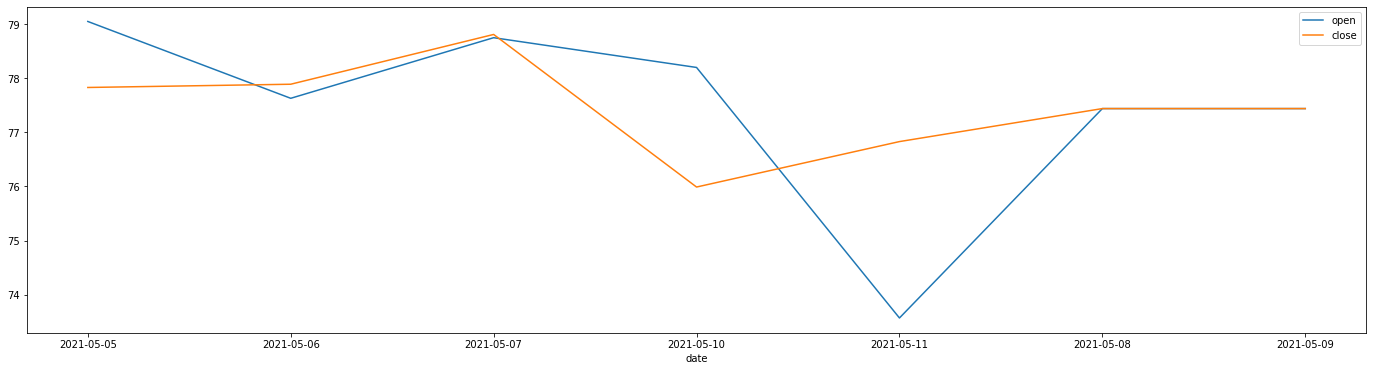

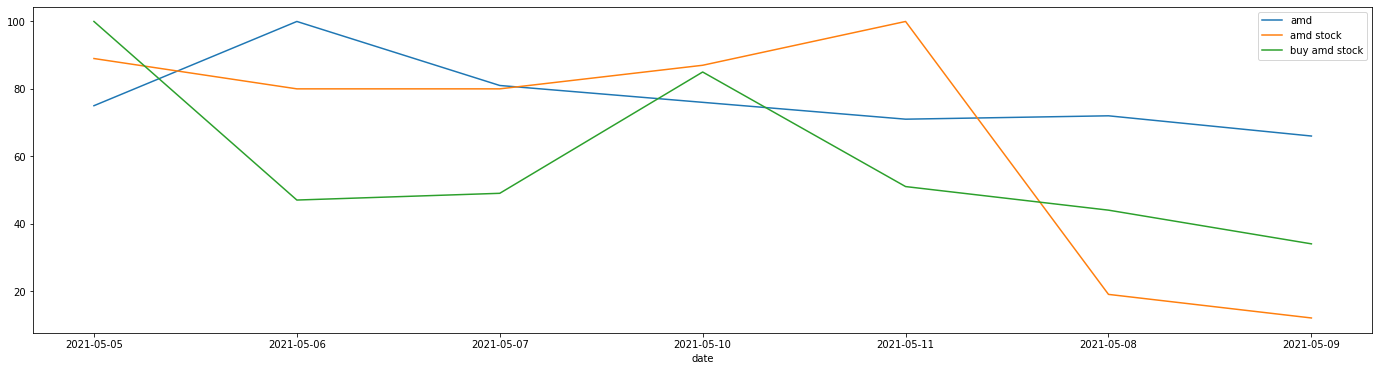

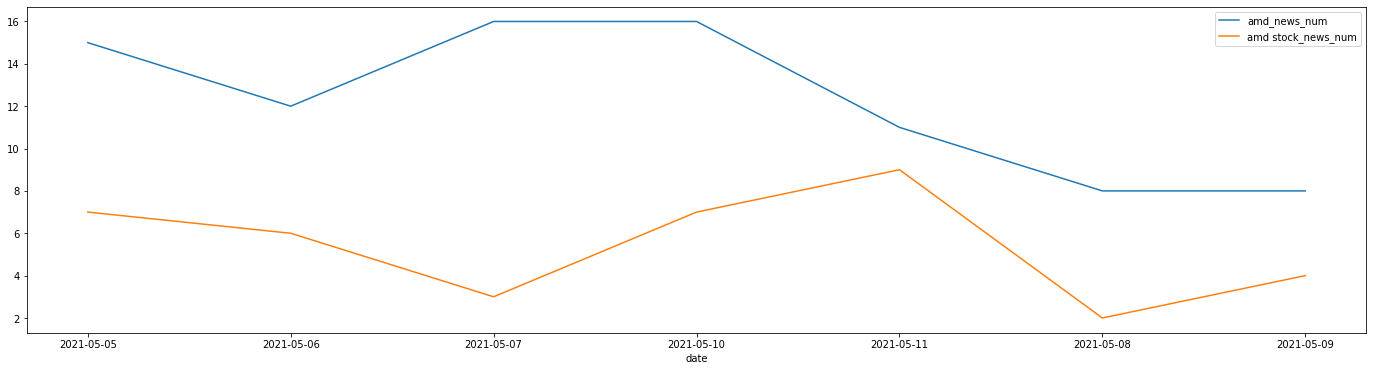

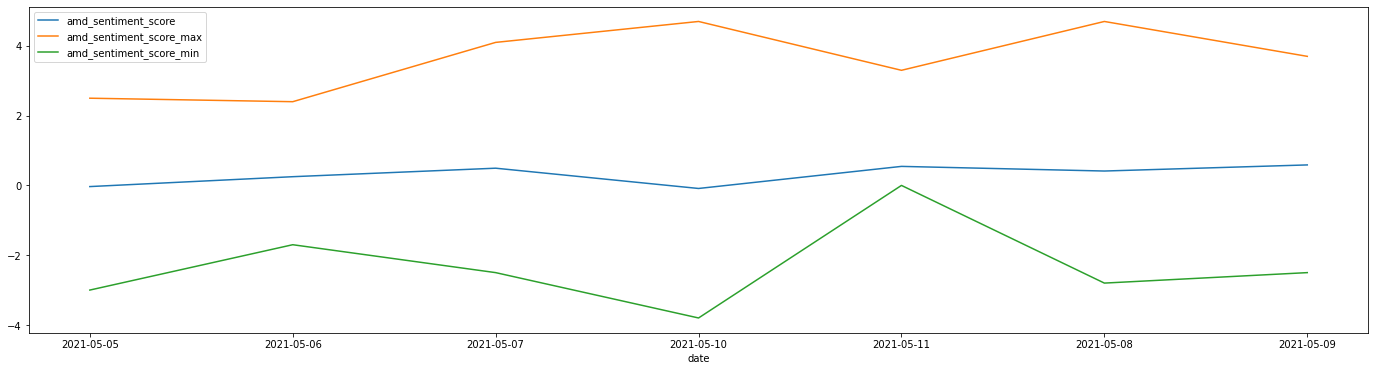

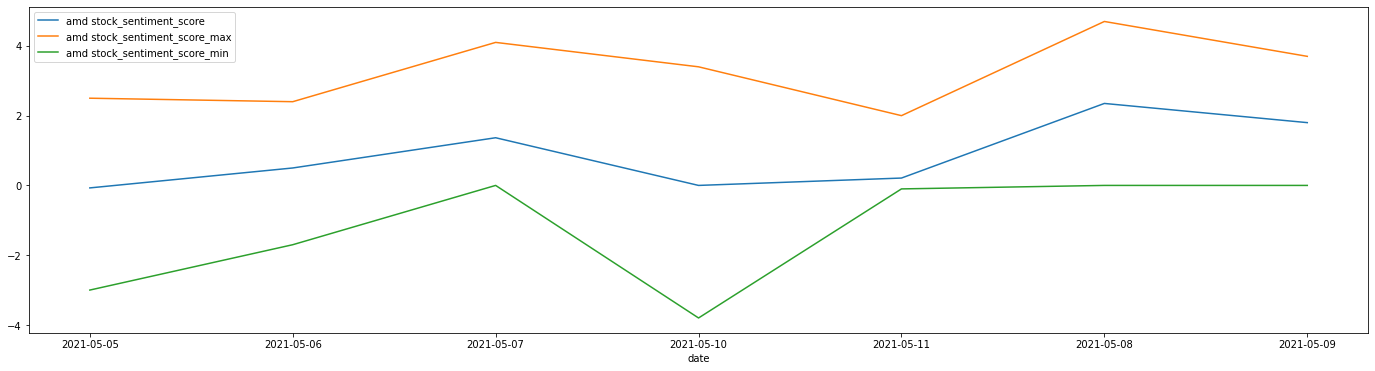

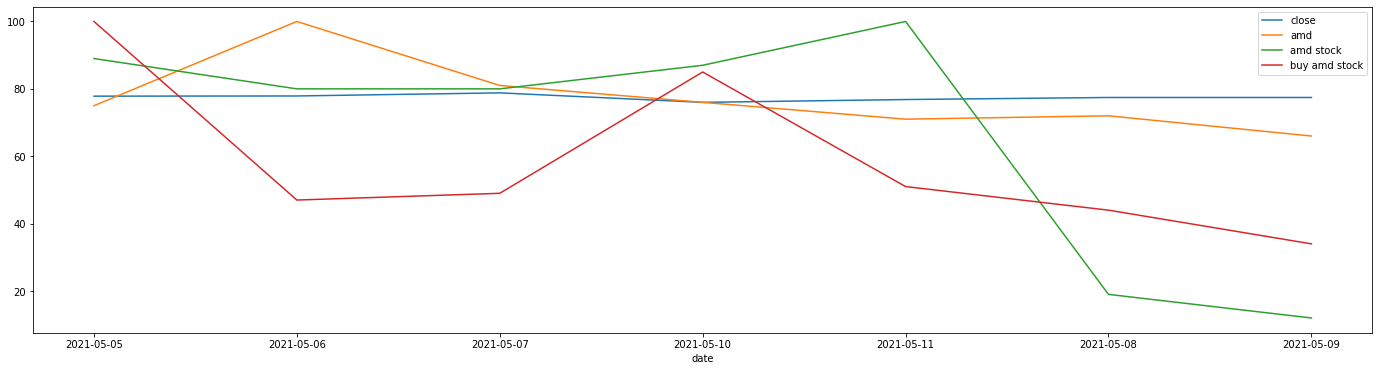

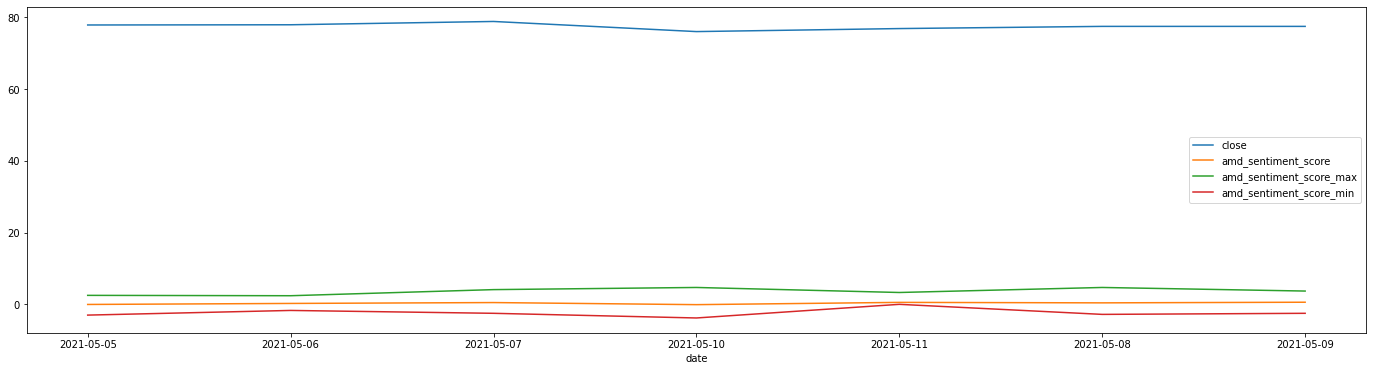

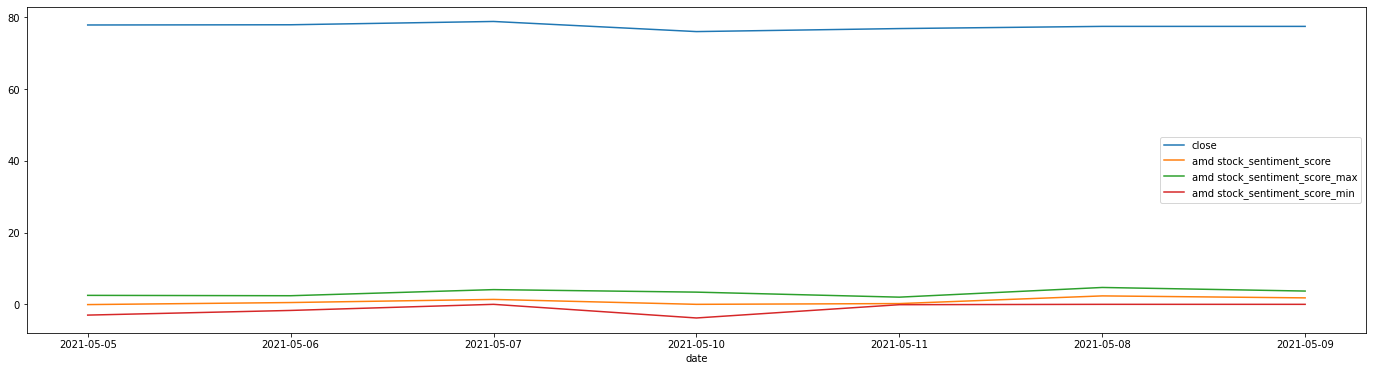

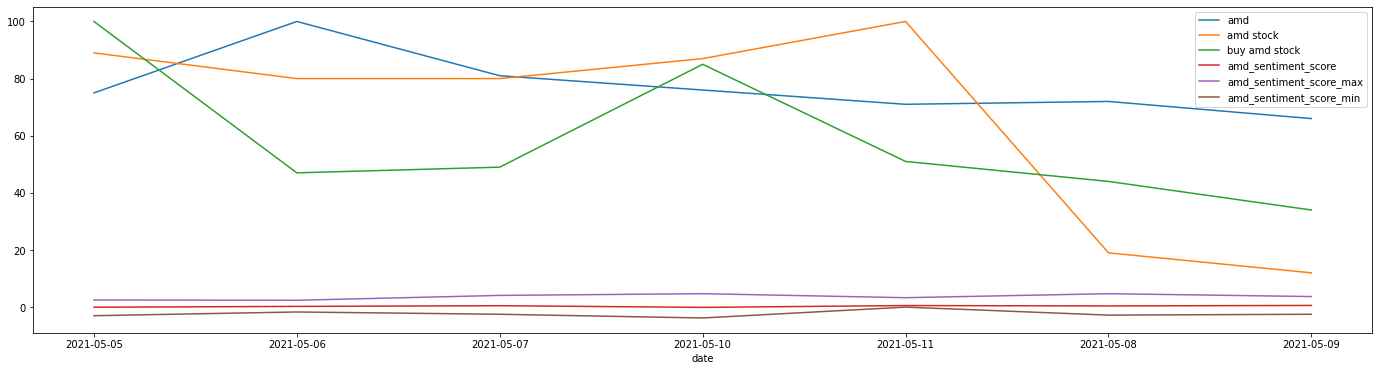

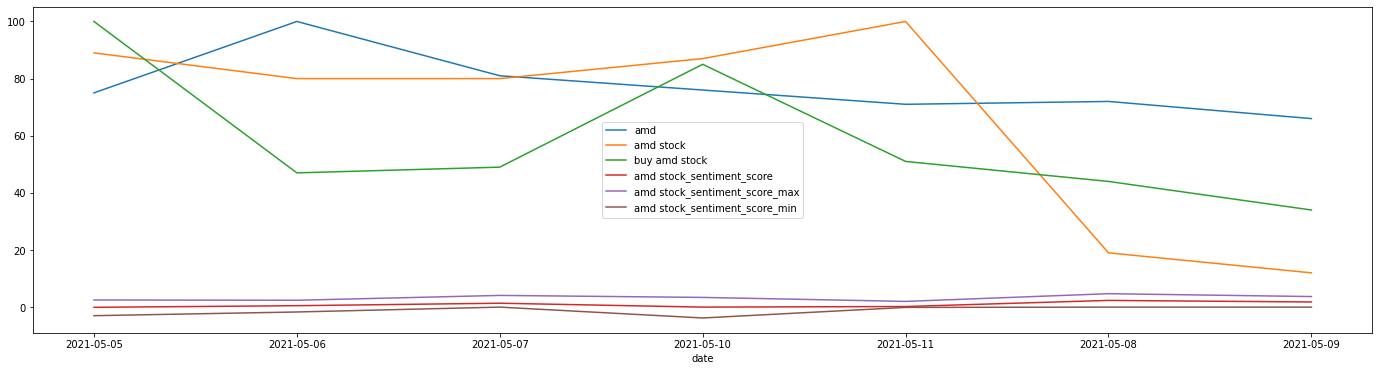

In [68]:
visualize_stock_data_for_a_week("AMD", "2021-05-11")